In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data_dir = "UCI HAR Dataset/"

In [2]:
df_X = pd.read_csv(data_dir+"train/X_train.txt", header=None, delim_whitespace=True)
df_y = pd.read_csv(data_dir+"train/y_train.txt", header=None, delim_whitespace=True)
df_sub = pd.read_csv(data_dir+"train/subject_train.txt", header=None, delim_whitespace=True)
print (df_X.shape)
print (df_y.shape)
print (df_sub.shape)

(7352, 561)
(7352, 1)
(7352, 1)


In [3]:
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
df_y.head()

,0
0,5
1,5
2,5
3,5
4,5


In [5]:
df = pd.concat([df_X, df_y, df_sub], axis=1, ignore_index=True)
df.rename(columns={561: "Activity", 562: "Person"}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,Activity,Person
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5,1


In [6]:
# Person1 = df[df['Person'] == 1]
# Person1.describe
Activities = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4 : "SITTING", 5 : "STANDING", 6 : "LAYING"}
print (Activities)

def slice_df(data_f, activity,person=None):
    ret_df = data_f[data_f['Activity'] == activity]
    ret_df.reset_index(inplace=True,drop=True)
    if person is None:
        return ret_df
    ret_df = ret_df[ret_df['Person'] == person]
    ret_df.reset_index(inplace=True,drop=True)
    return ret_df

{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


In [7]:
walking_df = slice_df(df, 1, 1)
walking_up_df = slice_df(df, 2, 1)
walking_down_df = slice_df(df, 3, 1)
sitting_df = slice_df(df, 4, 1)
standing_df = slice_df(df, 5, 1)
laying_df = slice_df(df, 6, 1)

Text(0.5, 1.0, 'laying')

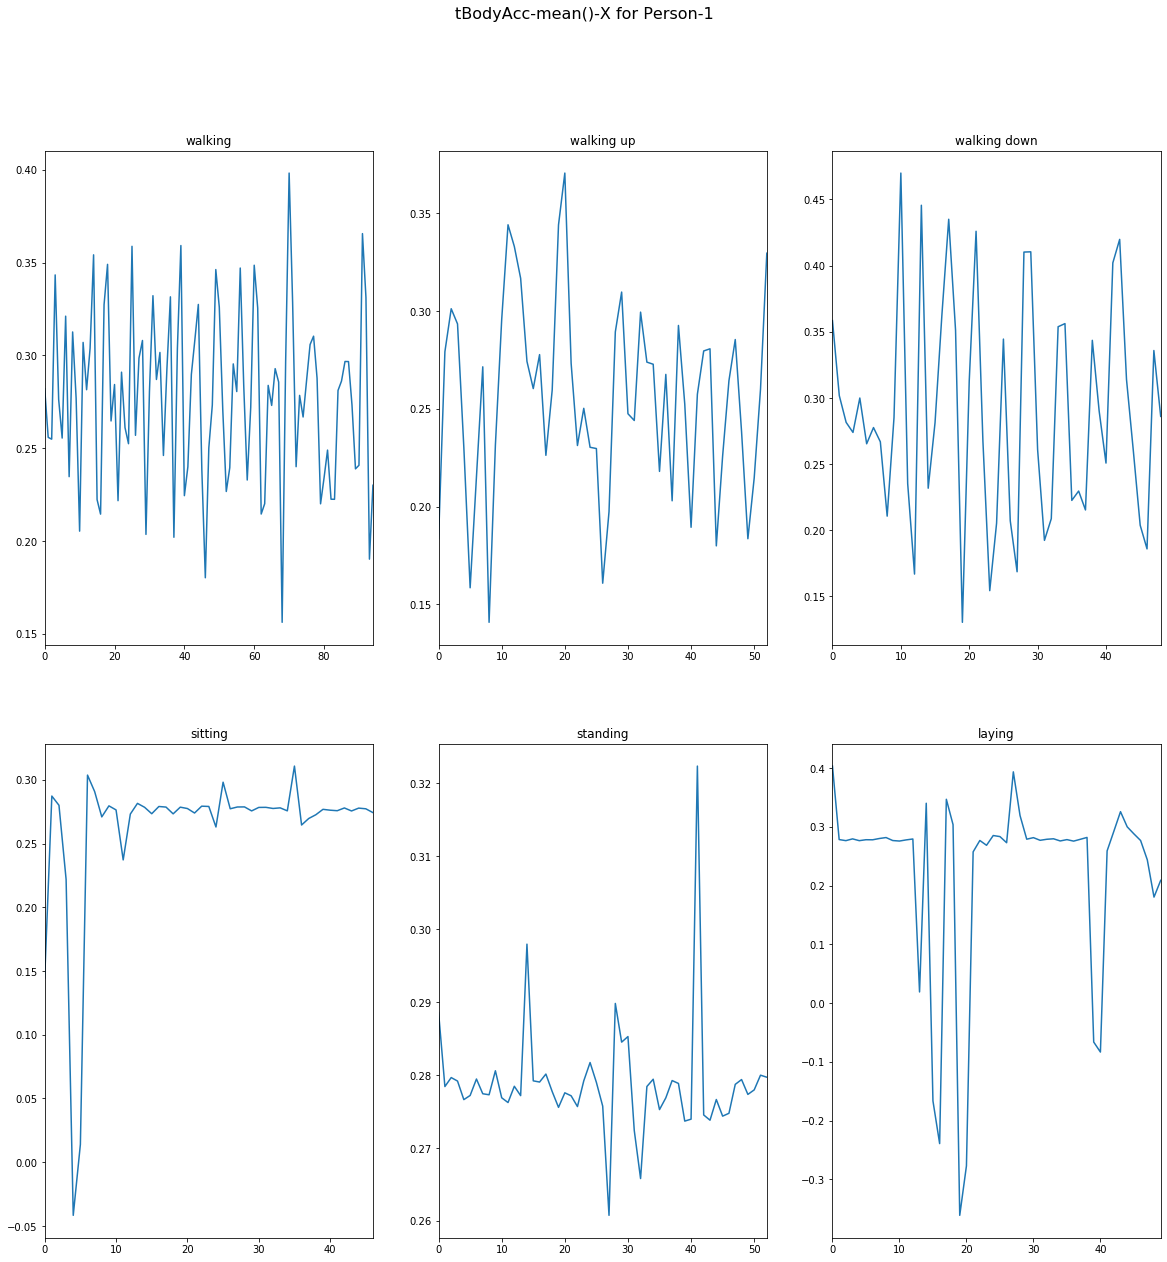

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,20))
fig.suptitle('tBodyAcc-mean()-X for Person-1', fontsize=16)
a1 = walking_df[0].plot(ax=axes[0,0])
a1.set_title("walking")
a2 = walking_up_df[0].plot(ax=axes[0,1])
a2.set_title("walking up")
a3 = walking_down_df[0].plot(ax=axes[0,2])
a3.set_title("walking down")
a4 = sitting_df[0].plot(ax=axes[1,0])
a4.set_title("sitting")
a5 = standing_df[0].plot(ax=axes[1,1])
a5.set_title("standing")
a6 = laying_df[0].plot(ax=axes[1,2])
a6.set_title("laying")

Text(0.5, 1.0, 'laying')

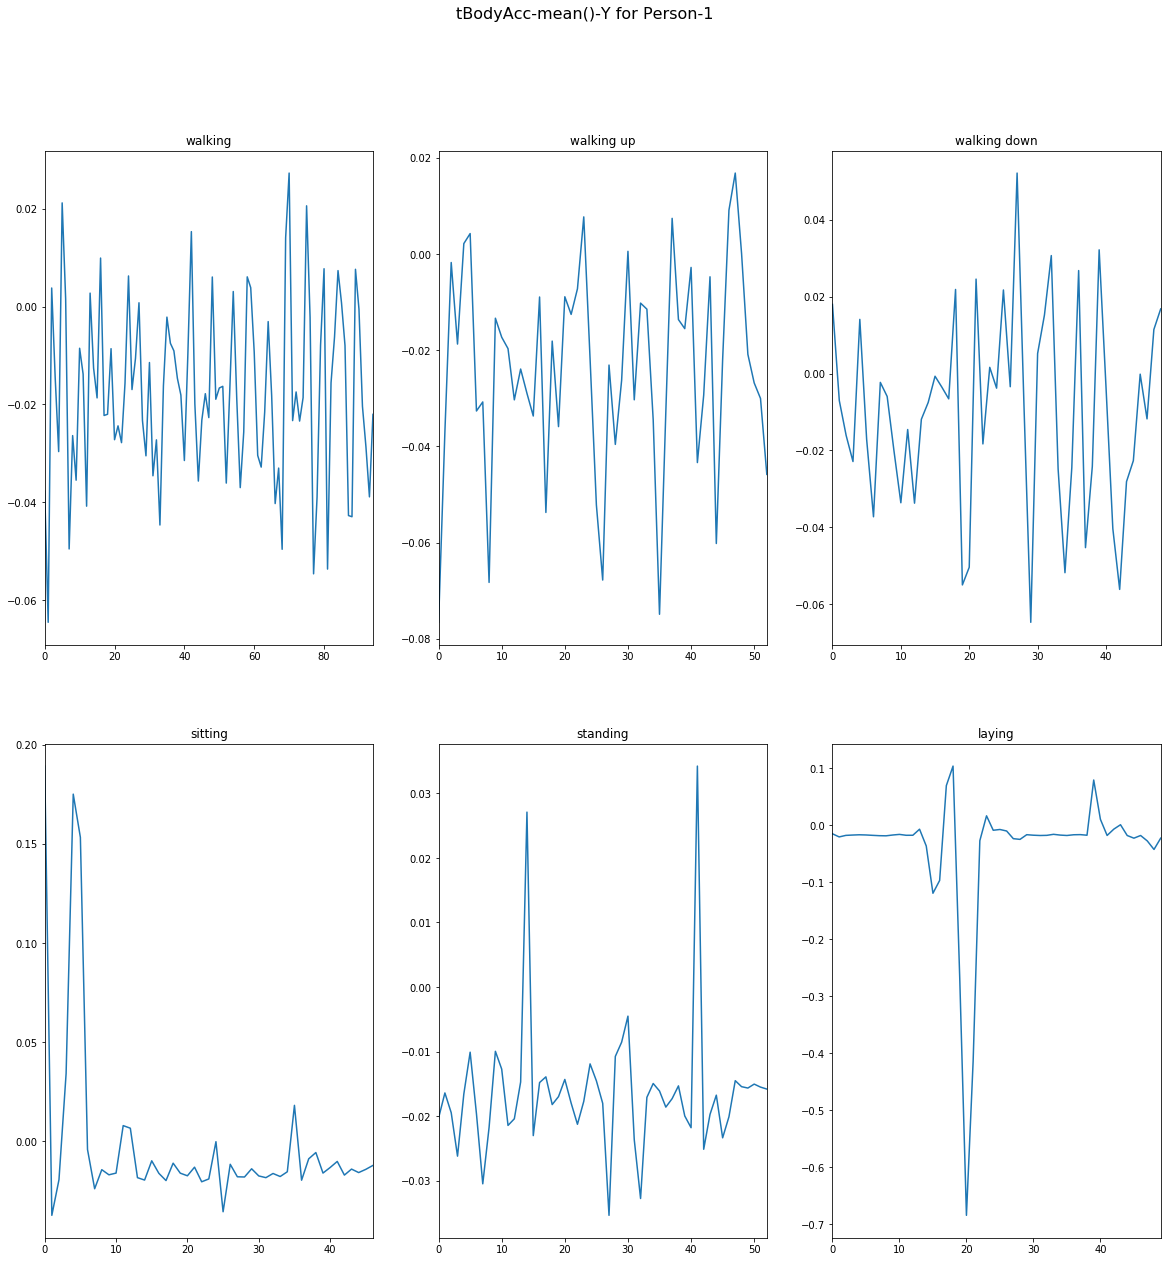

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,20))
fig.suptitle('tBodyAcc-mean()-Y for Person-1', fontsize=16)
a1 = walking_df[1].plot(ax=axes[0,0])
a1.set_title("walking")
a2 = walking_up_df[1].plot(ax=axes[0,1])
a2.set_title("walking up")
a3 = walking_down_df[1].plot(ax=axes[0,2])
a3.set_title("walking down")
a4 = sitting_df[1].plot(ax=axes[1,0])
a4.set_title("sitting")
a5 = standing_df[1].plot(ax=axes[1,1])
a5.set_title("standing")
a6 = laying_df[1].plot(ax=axes[1,2])
a6.set_title("laying")

Text(0.5, 1.0, 'laying')

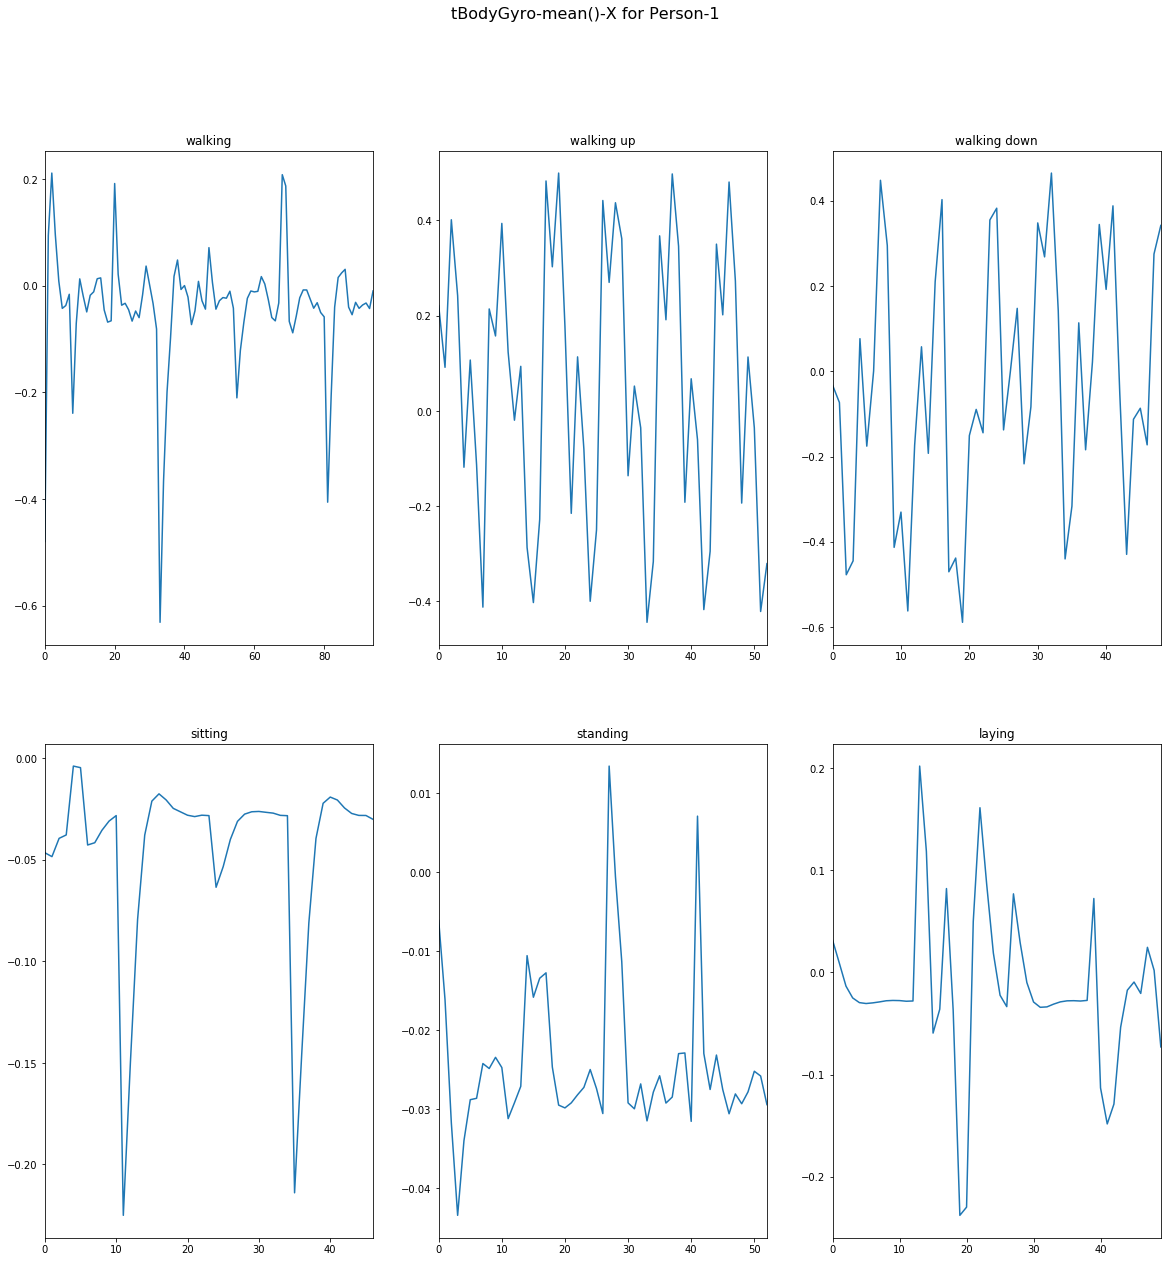

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,20))
fig.suptitle('tBodyGyro-mean()-X for Person-1', fontsize=16)
a1 = walking_df[120].plot(ax=axes[0,0])
a1.set_title("walking")
a2 = walking_up_df[120].plot(ax=axes[0,1])
a2.set_title("walking up")
a3 = walking_down_df[120].plot(ax=axes[0,2])
a3.set_title("walking down")
a4 = sitting_df[120].plot(ax=axes[1,0])
a4.set_title("sitting")
a5 = standing_df[120].plot(ax=axes[1,1])
a5.set_title("standing")
a6 = laying_df[120].plot(ax=axes[1,2])
a6.set_title("laying")

In [12]:
lay_df = df[df['Activity'] == 6]
lay_df

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,Activity,Person
51,0.403474,-0.015074,-0.118167,-0.914811,-0.895231,-0.891748,-0.917696,-0.924624,-0.905895,-0.785104,...,-0.021764,-0.068580,-0.043105,-0.332249,0.487505,0.432479,-0.553351,-0.432876,6,1
52,0.278373,-0.020561,-0.096825,-0.984883,-0.991118,-0.982112,-0.987985,-0.990362,-0.982189,-0.920051,...,-0.912512,-0.113048,0.223038,-0.393075,0.359037,0.399853,-0.550364,-0.427593,6,1
53,0.276555,-0.017869,-0.107621,-0.994195,-0.996372,-0.995615,-0.994901,-0.996360,-0.996628,-0.940164,...,-0.813040,0.293145,-0.018635,-0.246980,0.453923,0.399066,-0.546725,-0.431244,6,1
54,0.279575,-0.017276,-0.109481,-0.996135,-0.995812,-0.998689,-0.996393,-0.995474,-0.999006,-0.940773,...,-0.984028,0.240526,0.149804,0.393611,0.386719,0.399555,-0.546477,-0.431646,6,1
55,0.276527,-0.016819,-0.107983,-0.996775,-0.997256,-0.995422,-0.997167,-0.997108,-0.995739,-0.942673,...,-0.954254,-0.347519,-0.469155,0.308855,-0.354146,0.398889,-0.546712,-0.431207,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,0.289190,-0.021629,-0.098895,-0.988299,-0.990813,-0.987266,-0.989408,-0.991358,-0.986747,-0.925886,...,-0.903879,-0.015004,-0.005233,-0.045099,0.369611,0.565442,-0.534374,-0.470897,6,30
7258,0.288863,-0.021427,-0.101431,-0.990721,-0.993126,-0.990502,-0.991438,-0.992836,-0.989968,-0.925886,...,-0.941084,0.049695,-0.184366,-0.351473,0.213075,0.562080,-0.531512,-0.473734,6,30
7259,0.282409,-0.018051,-0.108965,-0.993142,-0.993896,-0.998631,-0.992864,-0.992996,-0.999530,-0.939157,...,-0.893333,0.286570,-0.206377,-0.081676,-0.681660,0.559409,-0.529620,-0.475579,6,30
7260,0.282771,-0.016040,-0.111293,-0.994014,-0.993007,-0.994326,-0.994220,-0.993099,-0.995379,-0.939157,...,-0.955822,0.061299,0.272947,0.299691,-0.116838,0.558825,-0.529376,-0.475804,6,30
